 ### El objetivo del ejercicio es identificar las columnas que contienen valores nulos y aplicar un proceso de imputación para manejarlos de manera adecuada.

### Instrucciones:

1. `Identificación de Valores Nulos`: Identifica todas las columnas que contengan valores nulos en el DataFrame.

In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
dfnulos = pd.read_csv('pair-gorupby-apply.csv')
dfnulos.head(5)

,Unnamed: 0,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capitalmajorcity,co2emissions,cpi,cpichange,currencycode,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urbanpopulation,longitude,latitude,continent
0,0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953,Asia
1,1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europe
2,2,Algeria,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626,Africa
3,3,Andorra,164,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801,Europe
4,4,Angola,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887,Africa


In [4]:
# variables categoricas

# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = dfnulos[dfnulos.columns[dfnulos.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['abbreviation', 'capitalmajorcity', 'currencycode', 'largestcity',
       'officiallanguage', 'continent'],
      dtype='object')


In [5]:
# sacamos el 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(dfnulos[col].value_counts() / dfnulos.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna ABBREVIATION


abbreviation
AF    0.005128
PY    0.005128
NE    0.005128
NG    0.005128
KP    0.005128
NO    0.005128
OM    0.005128
PK    0.005128
PW    0.005128
PA    0.005128
PG    0.005128
PE    0.005128
NZ    0.005128
PH    0.005128
PL    0.005128
PT    0.005128
QA    0.005128
RO    0.005128
RU    0.005128
RW    0.005128
KN    0.005128
LC    0.005128
NI    0.005128
NL    0.005128
AL    0.005128
MU    0.005128
LU    0.005128
MG    0.005128
MW    0.005128
MY    0.005128
MV    0.005128
ML    0.005128
MT    0.005128
MH    0.005128
MR    0.005128
MX    0.005128
NP    0.005128
FM    0.005128
MD    0.005128
MC    0.005128
MN    0.005128
ME    0.005128
MA    0.005128
MZ    0.005128
MM    0.005128
NR    0.005128
VC    0.005128
WS    0.005128
SM    0.005128
UA    0.005128
TL    0.005128
TG    0.005128
TO    0.005128
TT    0.005128
TN    0.005128
TR    0.005128
TM    0.005128
TV    0.005128
UG    0.005128
AE    0.005128
ST    0.005128
GB    0.005128
US    0.005128
UY    0.005128
UZ    0.005128
VU    0.0051

........................
La distribución de las categorías para la columna CAPITALMAJORCITY


capitalmajorcity
Kabul                     0.005128
Tirana                    0.005128
Wellington                0.005128
Managua                   0.005128
Niamey                    0.005128
Abuja                     0.005128
Pyongyang                 0.005128
Skopje                    0.005128
Oslo                      0.005128
Muscat                    0.005128
Islamabad                 0.005128
Ngerulmud                 0.005128
Panama City               0.005128
Port Moresby              0.005128
Asunci��                  0.005128
Lima                      0.005128
Manila                    0.005128
Warsaw                    0.005128
Lisbon                    0.005128
Doha                      0.005128
Bucharest                 0.005128
Moscow                    0.005128
Kigali                    0.005128
Amsterdam                 0.005128
Kathmandu                 0.005128
Yaren District            0.005128
Nouakchott                0.005128
Vilnius                   0.005128
Lux

........................
La distribución de las categorías para la columna CURRENCYCODE


currencycode
EUR    0.117949
XOF    0.041026
XCD    0.030769
USD    0.030769
XAF    0.025641
AUD    0.020513
CHF    0.010256
AFN    0.005128
PLN    0.005128
PYG    0.005128
PEN    0.005128
PHP    0.005128
RUB    0.005128
QAR    0.005128
RON    0.005128
PKR    0.005128
RWF    0.005128
WST    0.005128
STN    0.005128
SAR    0.005128
PGK    0.005128
KPW    0.005128
OMR    0.005128
NOK    0.005128
MKD    0.005128
NGN    0.005128
NIO    0.005128
NZD    0.005128
NPR    0.005128
MMK    0.005128
MZN    0.005128
MAD    0.005128
MNT    0.005128
MDL    0.005128
MXN    0.005128
MUR    0.005128
RSD    0.005128
SGD    0.005128
SCR    0.005128
SLL    0.005128
YER    0.005128
VND    0.005128
VED    0.005128
VUV    0.005128
UZS    0.005128
UYU    0.005128
GBP    0.005128
AED    0.005128
UAH    0.005128
UGX    0.005128
TMT    0.005128
TRY    0.005128
TND    0.005128
TTD    0.005128
TOP    0.005128
THB    0.005128
TZS    0.005128
TJS    0.005128
SYP    0.005128
SEK    0.005128
SRD    0.005128
SDG    0.00

........................
La distribución de las categorías para la columna LARGESTCITY


largestcity
S����                      0.010256
Panama City                0.005128
Managua                    0.005128
Niamey                     0.005128
Lagos                      0.005128
Pyongyang                  0.005128
Skopje                     0.005128
Oslo                       0.005128
Seeb                       0.005128
Karachi                    0.005128
Koror                      0.005128
Port Moresby               0.005128
Amsterdam                  0.005128
Ciudad del Este            0.005128
Lima                       0.005128
Manila                     0.005128
Warsaw                     0.005128
Lisbon                     0.005128
Doha                       0.005128
Bucharest                  0.005128
Moscow                     0.005128
Kigali                     0.005128
Auckland                   0.005128
Kabul                      0.005128
Castries                   0.005128
Port Louis                 0.005128
Luxembourg City            0.005128
Antananarivo    

........................
La distribución de las categorías para la columna OFFICIALLANGUAGE


officiallanguage
English                   0.158974
French                    0.128205
Spanish                   0.097436
Arabic                    0.092308
Portuguese                0.035897
German                    0.020513
Swahili                   0.020513
Russian                   0.020513
Italian                   0.015385
Swedish                   0.010256
Persian                   0.010256
Greek                     0.010256
Malay                     0.010256
Romanian                  0.010256
Dutch                     0.010256
Modern Standard Arabic    0.010256
Korean                    0.010256
Macedonian                0.005128
Norwegian                 0.005128
Pashto                    0.005128
Nepali                    0.005128
Burmese                   0.005128
Montenegrin language      0.005128
Urdu                      0.005128
Marshallese               0.005128
Maltese                   0.005128
Mongolian                 0.005128
Slovak                    0.005128
Tok

........................
La distribución de las categorías para la columna CONTINENT


continent
Africa               0.256410
Asia                 0.230769
Europe               0.210256
North America        0.107692
Australia/Oceania    0.066667
South America        0.061538
Name: count, dtype: float64

........................


In [6]:
#variables numericas

# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = dfnulos[dfnulos.columns[dfnulos.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['agriculturalland', 'landarea', 'armedforcessize', 'birthrate',
       'callingcode', 'co2emissions', 'cpi', 'cpichange', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
       'population', 'populationlaborforceparticipation', 'taxrevenue',
       'totaltaxrate', 'unemploymentrate', 'urbanpopulation', 'longitude',
       'latitude'],
      dtype='object')


In [7]:
# lo primero que vamos a hacer es calcular el número de nulos que tenemos en cada una de las columnas numericas
dfnulos[nulos_esta_num].isnull().sum() / dfnulos.shape[0]

agriculturalland                     0.035897
landarea                             0.005128
armedforcessize                      0.123077
birthrate                            0.030769
callingcode                          0.005128
co2emissions                         0.035897
cpi                                  0.087179
cpichange                            0.082051
fertilityrate                        0.035897
forestedarea                         0.035897
gasolineprice                        0.102564
gdp                                  0.010256
grossprimaryeducationenrollment      0.035897
grosstertiaryeducationenrollment     0.061538
infantmortality                      0.030769
lifeexpectancy                       0.041026
maternalmortalityratio               0.071795
minimumwage                          0.230769
outofpockethealthexpenditure         0.035897
physiciansperthousand                0.035897
population                           0.005128
populationlaborforceparticipation 

2. `Selección de Método de Imputación`: Discute en tu compañera cuál sería la mejor estrategia para manejar los valores nulos en cada una de las columnas identificadas en el paso anterior.

3. `Imputación de Valores Nulos`: Implementa el método de imputación seleccionado en el paso 2 para llenar los valores nulos en las columnas.

In [8]:
# Crear un diccionario para almacenar las medias
medias = {}

# Iterar sobre cada columna y calcular la media
for column in dfnulos.columns[1:]:
    if pd.api.types.is_numeric_dtype(dfnulos[column]):
        medias[column] = dfnulos[column].mean()

# Imprimir las medias
for columna, media in medias.items():
    print(f"La media de {columna} es {media:.2f}")

La media de density es 356.76
La media de agriculturalland es 39.12
La media de landarea es 689624.37
La media de armedforcessize es 159274.85
La media de birthrate es 20.21
La media de callingcode es 360.55
La media de co2emissions es 177799.24
La media de cpi es 190.46
La media de cpichange es 6.72
La media de fertilityrate es 2.70
La media de forestedarea es 32.02
La media de gasolineprice es 1.00
La media de gdp es 477295901399.54
La media de grossprimaryeducationenrollment es 102.47
La media de grosstertiaryeducationenrollment es 37.96
La media de infantmortality es 21.33
La media de lifeexpectancy es 72.28
La media de maternalmortalityratio es 160.39
La media de minimumwage es 2.19
La media de outofpockethealthexpenditure es 32.64
La media de physiciansperthousand es 1.84
La media de population es 39381164.01
La media de populationlaborforceparticipation es 62.74
La media de taxrevenue es 16.57
La media de totaltaxrate es 40.82
La media de unemploymentrate es 6.89
La media de urb

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

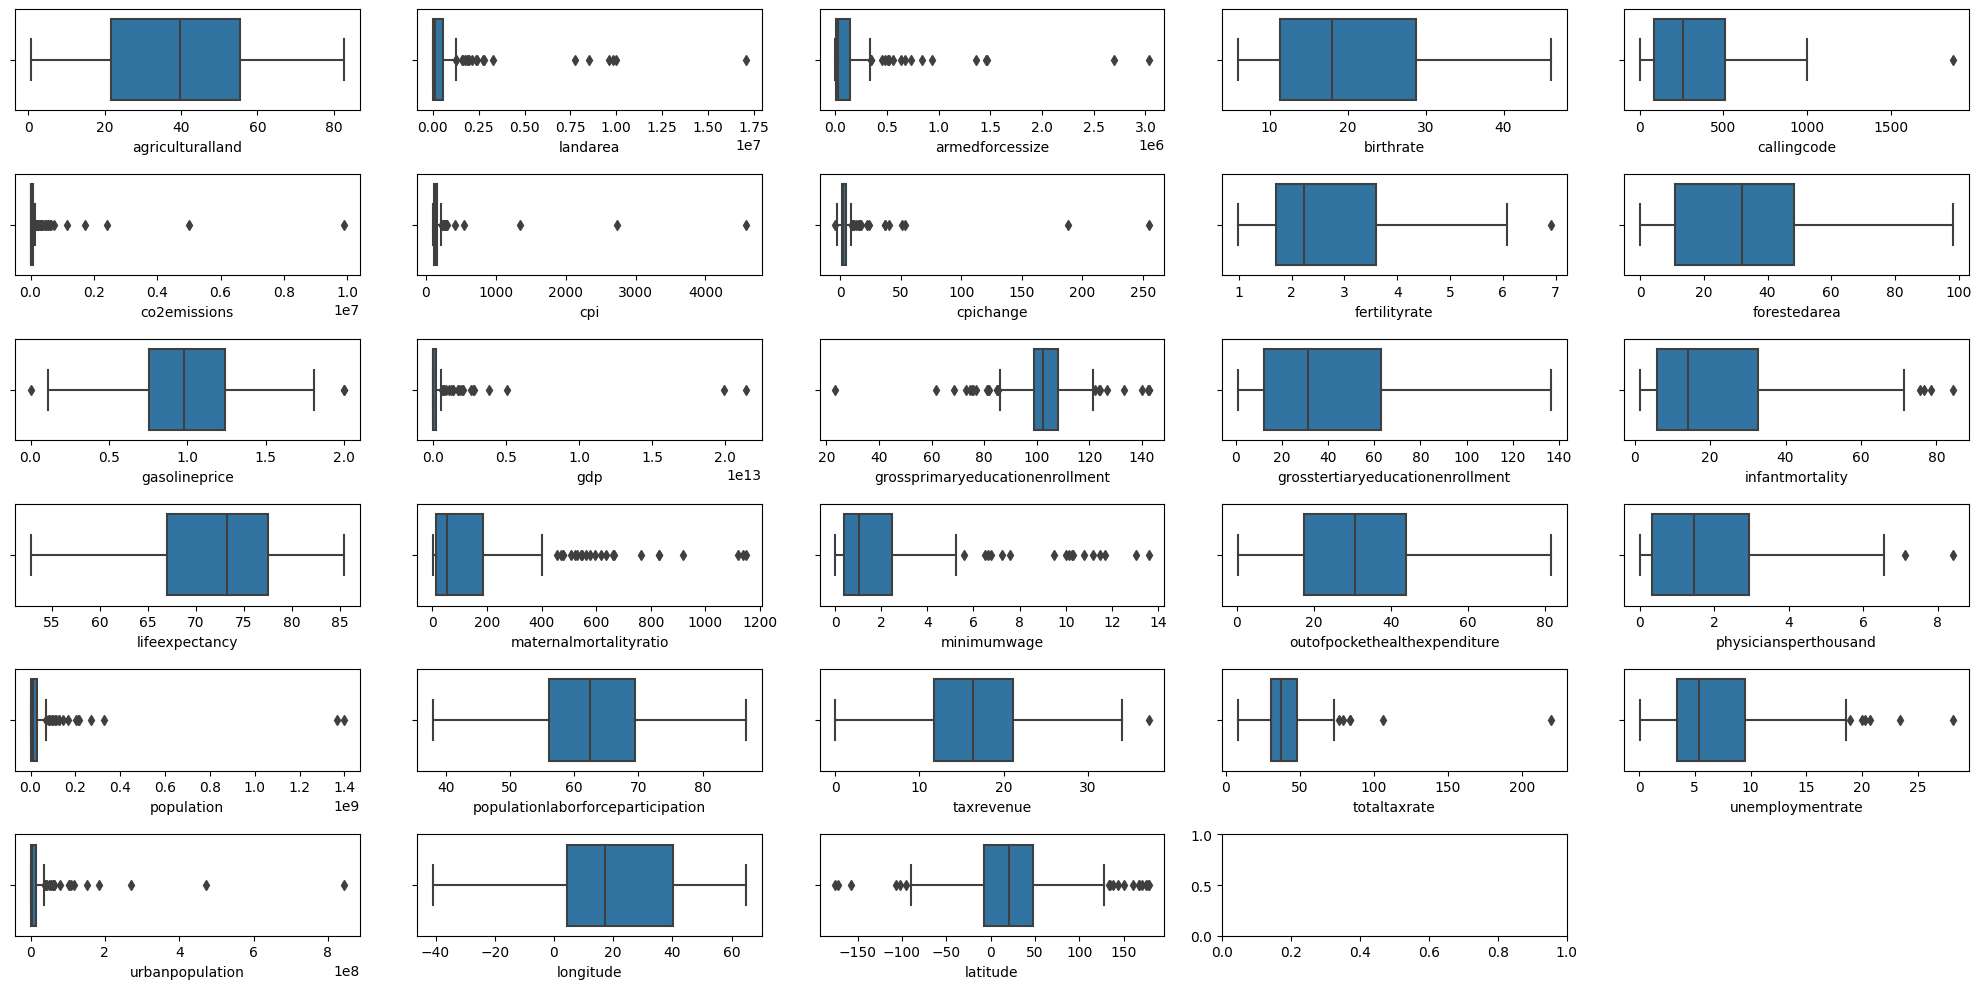

In [9]:
fig, axes = plt.subplots(nrows = 6, ncols = 5, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x = col, data = dfnulos, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

In [10]:
#mediana


# Crear un diccionario para almacenar las medianas
medianas = {}

# Iterar sobre cada columna y calcular la mediana
for column in dfnulos.columns[1:]:
    if pd.api.types.is_numeric_dtype(dfnulos[column]):
        medianas[column] = dfnulos[column].median()

# Imprimir las medianas con dos dígitos después de la coma
for columna, mediana in medianas.items():
    print(f"La mediana de {columna} es {mediana:.2f}")

La mediana de density es 89.00
La mediana de agriculturalland es 39.60
La mediana de landarea es 119511.00
La mediana de armedforcessize es 31000.00
La mediana de birthrate es 17.95
La mediana de callingcode es 255.50
La mediana de co2emissions es 12303.00
La mediana de cpi es 125.34
La mediana de cpichange es 2.30
La mediana de fertilityrate es 2.25
La mediana de forestedarea es 32.00
La mediana de gasolineprice es 0.98
La mediana de gdp es 34387229486.00
La mediana de grossprimaryeducationenrollment es 102.55
La mediana de grosstertiaryeducationenrollment es 31.20
La mediana de infantmortality es 14.00
La mediana de lifeexpectancy es 73.20
La mediana de maternalmortalityratio es 53.00
La mediana de minimumwage es 1.04
La mediana de outofpockethealthexpenditure es 30.70
La mediana de physiciansperthousand es 1.46
La mediana de population es 8826588.00
La mediana de populationlaborforceparticipation es 62.45
La mediana de taxrevenue es 16.30
La mediana de totaltaxrate es 37.20
La media

In [11]:
media = ['agriculturalland', 'birthrate', 'callingcode', 'fertilityrate', 'forestedarea', 'gasolineprice', 'grosstertiaryeducationenrollment', 'lifeexpectancy','outofpockethealthexpenditure', 'physiciansperthousand', 'populationlaborforceparticipation', 'taxrevenue' , 'longitude']

mediana = ['landarea', 'armedforcessize', 'co2emissions', 'cpi', 'cpichange', 'gdp', 'grossprimaryeducationenrollment', 'infantmortality', 'maternalmortalityratio', 'minimumwage', 'physiciansperthousand', 'population', 'totaltaxrate', 'unemploymentrate', 'urbanpopulation', 'latitude'  ]

In [16]:
# iteramos por la lista creada en el paso anterior:
for columna in media:
    
    # calculamos la moda para la columna por la que estamos iterando
    moda = dfnulos[columna].mean()   
    
    # utilizando el método fillna reemplazamos los valores nulos por la moda calculada en el paso anterior. 
    dfnulos[columna] = dfnulos[columna].fillna(moda)

# por último chequeamos si se han eliminado los nulos en las columnas de "marital" y "loan"
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

dfnulos[media].isnull().sum()

TypeError: 'numpy.float64' object is not iterable

4. `Informe`: Añade al final de un jupyter una explicación breve que describa las columnas que tenían valores nulos, cómo decidiste imputarlos y cualquier observación adicional que consideres importante sobre el proceso de limpieza de datos.

`Nota`: Puedes utilizar cualquier método o estrategia de imputación que consideres adecuado para los datos y discutir las ventajas y desventajas de tu elección en el informe.